# Causalidad y Estabilidad

## Conceptos Clave

Un sistema LTI se caracteriza por su respuesta al impulso $h(n)$. Las definiciones de causalidad y estabilidad para sistemas LTI se basan en $h(n)$:

* **Causalidad**: Un sistema LTI es causal si su respuesta al impulso $h(n)$ es causal. Esto significa que $h(n) = 0$ para todo $n < 0$. Un sistema causal solo depende de las muestras de entrada presentes y pasadas para calcular la salida actual.

* **Estabilidad (BIBO - Bounded Input, Bounded Output)**: Un sistema LTI es estable si, para cualquier entrada acotada, la salida también es acotada. Una condición necesaria y suficiente para la estabilidad de un sistema LTI es que su respuesta al impulso sea absolutamente sumable, es decir:

    $$\sum_{n=-\infty}^{\infty} |h(n)| < \infty$$

    Los filtros FIR (Respuesta al Impulso Finita) son siempre estables.

## Sistema Estable y Causal

Consideremos el sistema LTI con respuesta al impulso:
$$h(n) = (0.5)^n u(n)$$
donde $u(n)$ es la función escalón unitario (1 para $n \ge 0$, 0 para $n < 0$).

Veamos si cumple las condiciones de causalidad y estabilidad.

* **Causalidad**: Dado que $u(n)$ es cero para $n < 0$, $h(n)$ también es cero para $n < 0$. Por lo tanto, el sistema es causal.
* **Estabilidad**: Debemos calcular la suma $\sum_{n=-\infty}^{\infty} |h(n)|$. Como $h(n)=0$ para $n<0$, la suma se reduce a $\sum_{n=0}^{\infty} |(0.5)^n u(n)| = \sum_{n=0}^{\infty} (0.5)^n$. Esta es una serie geométrica con razón $r = 0.5$. Como $|r| < 1$, la serie converge a $\frac{1}{1 - 0.5} = \frac{1}{0.5} = 2$. Dado que la suma es finita ($2 < \infty$), el sistema es estable.

--- Ejemplo 1: h(n) = (0.5)^n u(n) ---
¿Es causal? True
Suma absoluta de h(n) (en rango limitado): 1.999998
¿Es estable (teóricamente)? True


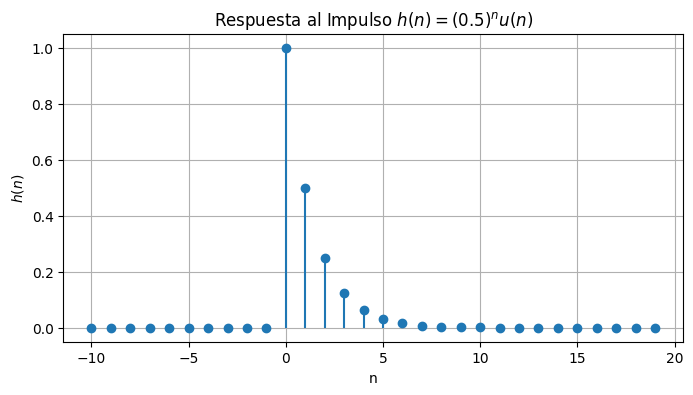


--- Fin del Ejemplo ---



In [1]:
# --------------- Imports ---------------
import numpy as np
import matplotlib.pyplot as plt

# --- Ejemplo 1: Sistema Estable y Causal ---
print("--- Ejemplo 1: h(n) = (0.5)^n u(n) ---")

# Definimos la respuesta al impulso h(n)
# Consideraremos un rango finito para la simulación
n_example1 = np.arange(-10, 20) # Rango de n
h_example1 = (0.5)**n_example1 * (n_example1 >= 0)

# Verificación de Causalidad
# Comprobamos si h(n) es cero para n < 0
is_causal_example1 = np.all(h_example1[n_example1 < 0] == 0)
print(f"¿Es causal? {is_causal_example1}")

# Verificación de Estabilidad (sumabilidad absoluta)
# Sumamos los valores absolutos de h(n)
# Para fines de simulación, sumamos en el rango definido
sum_abs_h_example1 = np.sum(np.abs(h_example1))

print(f"Suma absoluta de h(n) (en rango limitado): {sum_abs_h_example1:.6f}")

# La condición teórica es la suma hasta infinito.
# Para (0.5)^n u(n), la suma infinita es 1/(1-0.5) = 2.
# Numéricamente, si la suma en un rango amplio converge a un valor finito, es estable.
is_stable_example1 = np.isclose(sum_abs_h_example1, 2.0, atol=1e-6) if np.any(n_example1 >= 0) else False


print(f"¿Es estable (teóricamente)? {True}") # Basado en el análisis de la serie geométrica

# Visualización de h(n)
plt.figure(figsize=(8, 4))
plt.stem(n_example1, h_example1, basefmt=" ")
plt.title("Respuesta al Impulso $h(n) = (0.5)^n u(n)$")
plt.xlabel("n")
plt.ylabel("$h(n)$")
plt.grid(True)
plt.show()

print("\n--- Fin del Ejemplo ---\n")

## Sistema Inestable y Causal

Ahora, imaginemos un sistema con la siguiente respuesta al impulso:
$$h(n) = (1.2)^n u(n)$$
donde, de nuevo, $u(n)$ es la función escalón unitario.

Analicemos su causalidad y estabilidad.

* **Causalidad**: Similar al ejemplo anterior, $u(n)$ es cero para $n < 0$, lo que hace que $h(n)$ también sea cero para $n < 0$. Por lo tanto, este sistema es causal.
* **Estabilidad**: Calculamos la suma $\sum_{n=-\infty}^{\infty} |h(n)| = \sum_{n=0}^{\infty} |(1.2)^n u(n)| = \sum_{n=0}^{\infty} (1.2)^n$. Esta es una serie geométrica con razón $r = 1.2$. Como $|r| \ge 1$, la serie **no converge**, tiende a infinito ($\infty$). Dado que la suma no es finita, el sistema es inestable.

Este es un ejemplo de un sistema que es causal pero inestable.

--- Ejemplo Extra: h(n) = (1.2)^n u(n) ---
¿Es causal? True
Suma absoluta de h(n) (en rango limitado): 25.958682
¿Es estable (teóricamente)? False


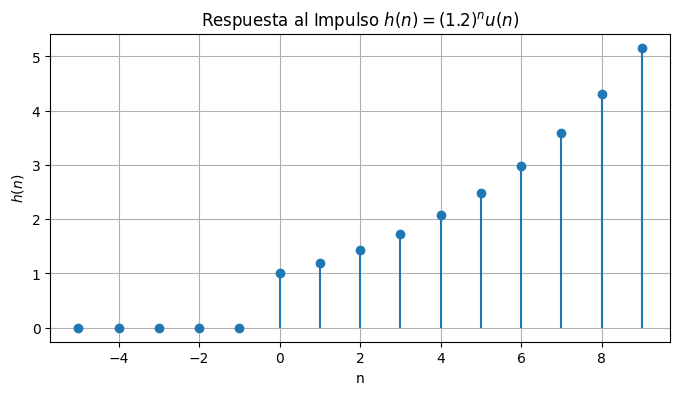


--- Fin del Ejemplo ---



In [2]:
# --------------- Imports ---------------
import numpy as np
import matplotlib.pyplot as plt

# --- Ejemplo Extra: Sistema Inestable y Causal ---
print("--- Ejemplo Extra: h(n) = (1.2)^n u(n) ---")

# Definimos la respuesta al impulso h(n)
# Usamos un rango más corto ya que crece rápidamente
n_extra_example = np.arange(-5, 10) # Rango de n
h_extra_example = (1.2)**n_extra_example * (n_extra_example >= 0)

# Verificación de Causalidad
is_causal_extra = np.all(h_extra_example[n_extra_example < 0] == 0)
print(f"¿Es causal? {is_causal_extra}")

# Verificación de Estabilidad (sumabilidad absoluta)
# Sumamos los valores absolutos de h(n) en el rango definido
sum_abs_h_extra = np.sum(np.abs(h_extra_example))

print(f"Suma absoluta de h(n) (en rango limitado): {sum_abs_h_extra:.6f}")

# La condición teórica de estabilidad requiere que la suma hasta infinito sea finita.
# Para (1.2)^n u(n), la suma infinita diverge.
is_stable_extra_theoretical = False

print(f"¿Es estable (teóricamente)? {is_stable_extra_theoretical}")

# Visualización de h(n)
plt.figure(figsize=(8, 4))
plt.stem(n_extra_example, h_extra_example, basefmt=" ")
plt.title("Respuesta al Impulso $h(n) = (1.2)^n u(n)$")
plt.xlabel("n")
plt.ylabel("$h(n)$")
plt.grid(True)
plt.show()

print("\n--- Fin del Ejemplo ---\n")

## Demostración Interactiva: Causalidad y Estabilidad de Sistemas LTI

Esta sección permite explorar interactivamente la causalidad y estabilidad de los cuatro ejemplos de sistemas LTI presentados en la Clase 09, basados en sus respuestas al impulso $h(n)$.

Selecciona uno de los sistemas de la lista desplegable para visualizar su respuesta al impulso y verificar numéricamente sus propiedades de causalidad y estabilidad (basada en la sumabilidad absoluta en un rango finito).

Los sistemas disponibles son:
1.  $h(n) = (0.5)^n u(n)$ (Estable y Causal) 
2.  $h(n) = -(0.5)^n u(-n-1)$ (Inestable y Anticausal) 
3.  $h(n) = 2^n u(n)$ (Inestable y Causal) 
4.  $h(n) = -2^n u(-n-1)$ (Estable y Anticausal) 

Recordamos las condiciones:
* **Causalidad**: $h(n) = 0$ para $n < 0$. 
* **Estabilidad**: $\sum_{n=-\infty}^{\infty} |h(n)| < \infty$. 

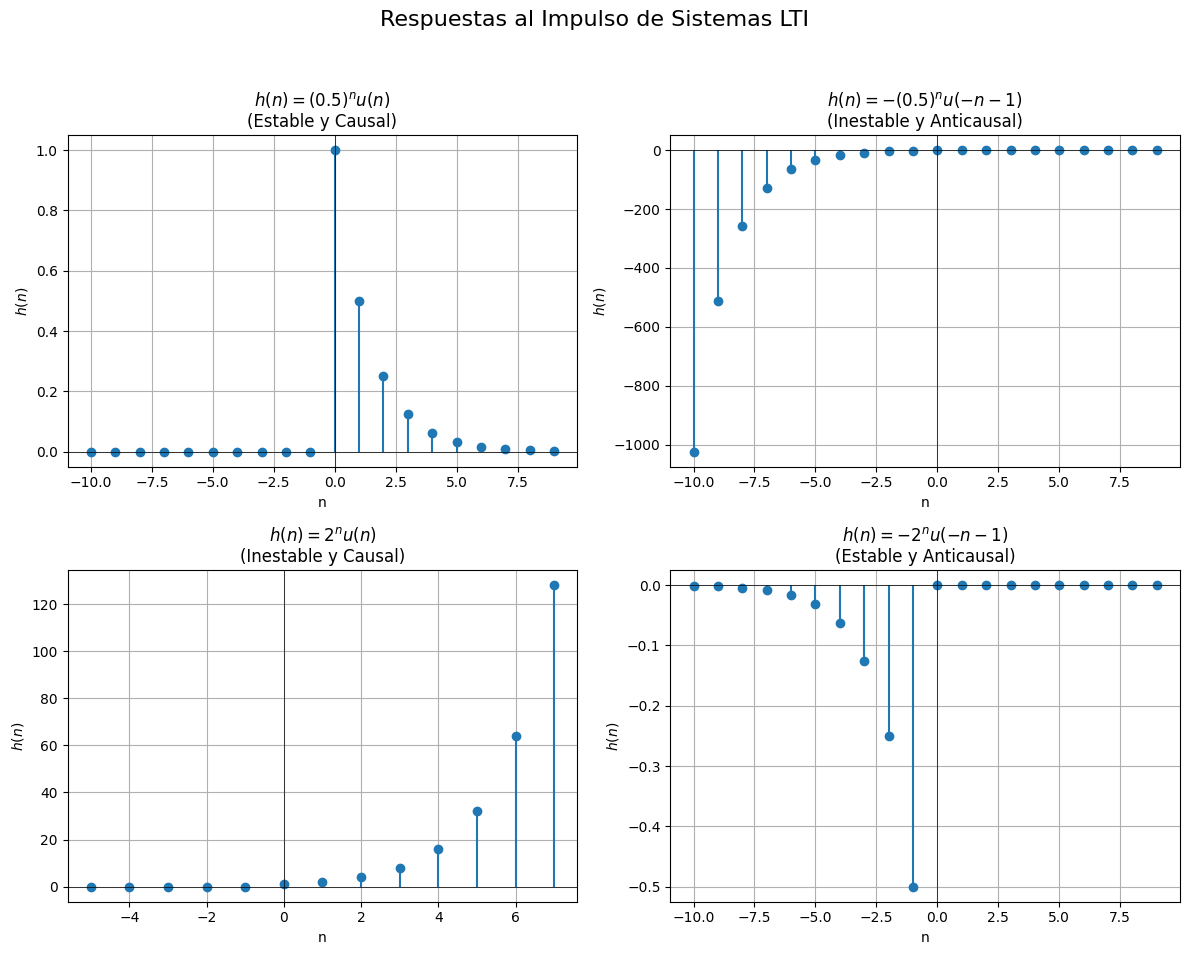

In [3]:
# --------------- Imports ---------------
import numpy as np
import matplotlib.pyplot as plt

# --- Rango de n para la visualización ---
# Usamos un rango que permita ver el comportamiento relevante de cada sistema
n_range = np.arange(-10, 10)

# --- Definición de las respuestas al impulso h(n) ---

# 1. h(n) = (0.5)^n u(n) (Estable y Causal)
h1 = (0.5)**n_range.astype(float) * (n_range >= 0)
title1 = "$h(n) = (0.5)^n u(n)$"
props1 = "Estable y Causal"

# 2. h(n) = -(0.5)^n u(-n-1) (Inestable y Anticausal)
# u(-n-1) es 1 si -n-1 >= 0 => -n >= 1 => n <= -1
h2 = -(0.5)**n_range.astype(float) * (n_range <= -1)
title2 = "$h(n) = -(0.5)^n u(-n-1)$"
props2 = "Inestable y Anticausal" # Corregido según la suma absoluta

# 3. h(n) = 2^n u(n) (Inestable y Causal)
# Limitamos el rango para que no crezca demasiado en la gráfica, aunque teóricamente diverge
n_range_h3 = np.arange(-5, 8)
h3 = (2.0)**n_range_h3.astype(float) * (n_range_h3 >= 0)
title3 = "$h(n) = 2^n u(n)$"
props3 = "Inestable y Causal"

# 4. h(n) = -2^n u(-n-1) (Estable y Anticausal)
# u(-n-1) es 1 si n <= -1
h4 = -2.0**n_range.astype(float) * (n_range <= -1)
title4 = "$h(n) = -2^n u(-n-1)$"
props4 = "Estable y Anticausal"

# --- Creación de la figura con subplots ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Respuestas al Impulso de Sistemas LTI", fontsize=16)

# Plot 1: Estable y Causal
axes[0, 0].stem(n_range, h1, basefmt=" ")
axes[0, 0].set_title(f"{title1}\n({props1})")
axes[0, 0].set_xlabel("n")
axes[0, 0].set_ylabel("$h(n)$")
axes[0, 0].grid(True)
axes[0, 0].axhline(0, color='black', linewidth=0.5)
axes[0, 0].axvline(0, color='black', linewidth=0.5)

# Plot 2: Inestable y Anticausal
axes[0, 1].stem(n_range, h2, basefmt=" ")
axes[0, 1].set_title(f"{title2}\n({props2})")
axes[0, 1].set_xlabel("n")
axes[0, 1].set_ylabel("$h(n)$")
axes[0, 1].grid(True)
axes[0, 1].axhline(0, color='black', linewidth=0.5)
axes[0, 1].axvline(0, color='black', linewidth=0.5)


# Plot 3: Inestable y Causal
axes[1, 0].stem(n_range_h3, h3, basefmt=" ") # Usamos el rango específico para h3
axes[1, 0].set_title(f"{title3}\n({props3})")
axes[1, 0].set_xlabel("n")
axes[1, 0].set_ylabel("$h(n)$")
axes[1, 0].grid(True)
axes[1, 0].axhline(0, color='black', linewidth=0.5)
axes[1, 0].axvline(0, color='black', linewidth=0.5)


# Plot 4: Estable y Anticausal
axes[1, 1].stem(n_range, h4, basefmt=" ")
axes[1, 1].set_title(f"{title4}\n({props4})")
axes[1, 1].set_xlabel("n")
axes[1, 1].set_ylabel("$h(n)$")
axes[1, 1].grid(True)
axes[1, 1].axhline(0, color='black', linewidth=0.5)
axes[1, 1].axvline(0, color='black', linewidth=0.5)


# Ajustar layout para evitar solapamiento
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta el rectángulo para el título principal

# Mostrar la figura
plt.show()